# Hola &#x1F600;,

Soy **Hesus Garcia** – **"Soy el único Hesus que conoces (y probablemente conocerás) 🌟"** – Sí, como "Jesús", pero con una H que me hace único. Puede sonar raro, pero créeme, ¡no lo olvidarás! Como tu revisor en Triple-Ten, estoy aquí para guiarte y ayudarte a mejorar tu código. Si algo necesita un ajuste, no hay de qué preocuparse; ¡aquí estoy para hacer que tu trabajo brille con todo su potencial! ✨

Cada vez que encuentre un detalle importante en tu código, te lo señalaré para que puedas corregirlo y así te prepares para un ambiente de trabajo real, donde el líder de tu equipo actuaría de manera similar. Si en algún momento no logras solucionar el problema, te daré más detalles para ayudarte en nuestra próxima oportunidad de revisión.

Es importante que cuando encuentres un comentario, **no los muevas, no los modifiques, ni los borres**.

---

### Formato de Comentarios

Revisaré cuidadosamente cada implementación en tu notebook para asegurar que cumpla con los requisitos y te daré comentarios de acuerdo al siguiente formato:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Éxito</b> - ¡Excelente trabajo! Esta parte está bien implementada y contribuye significativamente al análisis de datos o al proyecto. Continúa aplicando estas buenas prácticas en futuras secciones.
    
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Atención</b> ⚠️ - Este código está correcto, pero se puede optimizar. Considera implementar mejoras para que sea más eficiente y fácil de leer. Esto fortalecerá la calidad de tu proyecto.
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>A resolver</b> ❗ - Aquí hay un problema o error en el código que es necesario corregir para aprobar esta sección. Por favor, revisa y corrige este punto, ya que es fundamental para la validez del análisis y la precisión de los resultados.
    
</div>

---

Al final de cada revisión, recibirás un **Comentario General del Revisor** que incluirá:

- **Aspectos positivos:** Un resumen de los puntos fuertes de tu proyecto.
- **Áreas de mejora:** Sugerencias sobre aspectos donde puedes mejorar.
- **Temas adicionales para investigar:** Ideas de temas opcionales que puedes explorar por tu cuenta para desarrollar aún más tus habilidades.

Estos temas adicionales no son obligatorios en esta etapa, pero pueden serte útiles para profundizar en el futuro.

---


Esta estructura en viñetas facilita la lectura y comprensión de cada parte del comentario final.

También puedes responderme de la siguiente manera si tienes alguna duda o quieres aclarar algo específico:


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Aquí puedes escribir tu respuesta o pregunta sobre el comentario.
    
</div>


**¡Empecemos!** &#x1F680;


# Sprint 9 - Proyecto

## Paso 1. Acceda los datos y prepáralos para el análisis


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

df_visits_log_us = pd.read_csv('/datasets/visits_log_us.csv')
df_orders_log_us = pd.read_csv('/datasets/orders_log_us.csv')
df_costs_us = pd.read_csv('/datasets/costs_us.csv')

In [2]:
df_visits_log_us.info()
print()
df_orders_log_us.info()
print()
df_costs_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - Muy bien hecho en esta primera sección. Lograste cargar correctamente los datasets e inspeccionaste su estructura con claridad. Este paso inicial es esencial para garantizar un análisis sólido más adelante. Vas por muy buen camino. </div>


## Paso 2. Haz informes y calcula métricas 

### Visitas:

In [3]:
# Convierte las columnas de fecha a datetime
df_visits_log_us['Start Ts'] = pd.to_datetime(df_visits_log_us['Start Ts'])
df_visits_log_us['End Ts'] = pd.to_datetime(df_visits_log_us['End Ts'])
df_orders_log_us['Buy Ts'] = pd.to_datetime(df_orders_log_us['Buy Ts'])
df_costs_us['dt'] = pd.to_datetime(df_costs_us['dt'])

# Extrae componentes de tiempo para DAU, WAU, MAU
df_visits_log_us['session_year'] = df_visits_log_us['Start Ts'].dt.year
df_visits_log_us['session_month'] = df_visits_log_us['Start Ts'].dt.month
df_visits_log_us['session_week'] = df_visits_log_us['Start Ts'] - pd.to_timedelta(df_visits_log_us['Start Ts'].dt.dayofweek, unit='d')
df_visits_log_us['session_date'] = df_visits_log_us['Start Ts'].dt.date

1. ¿Cuántas personas lo usan cada día, semana y mes?

In [4]:
# Calcula DAU
dau_total = df_visits_log_us.groupby('session_date').agg(daily_active_users=('Uid', 'nunique')).mean()
dau_total_value = dau_total['daily_active_users']

print(f"Número promedio de usuarios activos diarios (DAU): {dau_total_value:.2f}")

# Calcula WAU
wau_total = df_visits_log_us.groupby(['session_year', 'session_week']).agg(weekly_active_users=('Uid', 'nunique')).mean()
wau_total_value = wau_total['weekly_active_users']

print(f"Número promedio de usuarios activos semanales (WAU): {wau_total_value:.2f}")

# Calcula MAU
mau_total = df_visits_log_us.groupby(['session_year', 'session_month']).agg(monthly_active_users=('Uid', 'nunique')).mean()
mau_total_value = mau_total['monthly_active_users']

print(f"Número promedio de usuarios activos mensuales (MAU): {mau_total_value:.2f}")

Número promedio de usuarios activos diarios (DAU): 907.99
Número promedio de usuarios activos semanales (WAU): 5.64
Número promedio de usuarios activos mensuales (MAU): 23228.42


2. ¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión).

In [5]:
# Extrae la fecha (solo día, mes, año) de 'Start Ts'
df_visits_log_us['session_date'] = df_visits_log_us['Start Ts'].dt.date

# Cuenta el número de sesiones por día
# Agrupa por 'session_date' y contamos todas las entradas (sesiones) en cada día.
sessions_per_day = df_visits_log_us.groupby('session_date').agg(total_sessions=('Uid', 'count'))

# Calcula el promedio de sesiones por día a lo largo de todo el periodo
average_sessions_per_day = sessions_per_day.mean()

print("Número promedio de sesiones por día:")
print(f"{average_sessions_per_day['total_sessions']:.2f}")

Número promedio de sesiones por día:
987.36


3. ¿Cuál es la duración de cada sesión?

In [6]:
# Calcula la duración de cada sesión en segundos
# Restamos 'Start Ts' de 'End Ts' para obtener un Timedelta, y luego extraemos el total de segundos.
df_visits_log_us['session_duration_sec'] = (df_visits_log_us['End Ts'] - df_visits_log_us['Start Ts']).dt.seconds

# Imprimi el promedio de la duración de las sesiones
average_session_duration = df_visits_log_us['session_duration_sec'].mean()

print(f"Duración promedio de cada sesión: {average_session_duration:.2f} segundos")

Duración promedio de cada sesión: 643.51 segundos


4. ¿Con qué frecuencia los usuarios regresan?

In [7]:
# Calcula el factor de retención DAU/MAU
dau_mau_stickiness = (dau_total_value / mau_total_value) * 100

# Calcula el factor de retención WAU/MAU
wau_mau_stickiness = (wau_total_value / mau_total_value) * 100

print(f"Factor de retención DAU/MAU: {dau_mau_stickiness:.2f}%")
print(f"Factor de retención WAU/MAU: {wau_mau_stickiness:.2f}%")

Factor de retención DAU/MAU: 3.91%
Factor de retención WAU/MAU: 0.02%


#### Observaciones Preliminares de Visitas

**Usuarios Activos (DAU, WAU, MAU)**
El servicio tiene un promedio de 907.99 usuarios activos diarios (DAU), 5716.25 usuarios activos semanales (WAU) y 23228.42 usuarios activos mensuales (MAU). Esto sugiere una base de usuarios considerable, pero el contraste entre MAU y DAU/WAU nos dará más contexto sobre la frecuencia de uso.

**Sesiones**
En promedio, hay 987.36 sesiones por día. Dado que el DAU es de 907.99, esto indica que, en promedio, cada usuario activo diario realiza un poco más de una sesión al día (aproximadamente 1.09 sesiones/usuario/día).

**Duración de Sesión**
La duración promedio de cada sesión es de 643.51 segundos, lo que equivale a unos 10 minutos y 43 segundos. Esta es una duración razonable para una sesión en línea, indicando que los usuarios dedican tiempo al servicio cuando lo visitan.

**Frecuencia de Retorno** (Stickiness)

- **DAU/MAU**: 3.91%. Este porcentaje relativamente bajo indica que, de los usuarios activos en un mes, solo una pequeña fracción regresa en un día promedio. Esto sugiere que Showz no es un servicio de uso diario para la mayoría de sus usuarios.

- **WAU/MAU**: 24.61%. Este valor, aunque más alto que el DAU/MAU, también sugiere que aproximadamente una cuarta parte de los usuarios mensuales son activos semanalmente. Esto indica un patrón de uso más bien semanal o esporádico para muchos usuarios, en lugar de un uso diario consistente.

**Conclusiones Iniciales sobre Visitas**
Las métricas de usuarios activos y sesiones muestran una buena cantidad de actividad en Showz. Sin embargo, los factores de retención (stickiness) sugieren que la plataforma no es utilizada con una alta frecuencia diaria o incluso semanal por la mayoría de los usuarios mensuales. La duración de la sesión es decente, lo que significa que cuando los usuarios interactúan, lo hacen de manera significativa. Para optimizar el marketing, será clave entender si esta baja frecuencia de retorno es típica de este tipo de servicio o si hay oportunidades para aumentar el engagement.

### Ventas:

In [8]:
# Extrae componentes de tiempo para df_orders_log_us
df_orders_log_us['order_year'] = df_orders_log_us['Buy Ts'].dt.year
df_orders_log_us['order_month'] = df_orders_log_us['Buy Ts'].dt.month
df_orders_log_us['order_week'] = df_orders_log_us['Buy Ts'] - pd.to_timedelta(df_orders_log_us['Buy Ts'].dt.dayofweek, unit='d')
df_orders_log_us['order_date'] = df_orders_log_us['Buy Ts'].dt.date


1. ¿Cuándo empieza la gente a comprar? (En el análisis de KPI, generalmente nos interesa saber el tiempo que transcurre entre el registro y la conversión, es decir, cuando el usuario se convierte en cliente. Por ejemplo, si el registro y la primera compra ocurren el mismo día, el usuario podría caer en la categoría Conversion 0d. Si la primera compra ocurre al día siguiente, será Conversion 1d. Puedes usar cualquier enfoque que te permita comparar las conversiones de diferentes cohortes para que puedas determinar qué cohorte o canal de marketing es más efectivo.)


In [9]:
# 1. Obtene la fecha de la primera visita para cada usuario (Uid)
# Agrupamos por 'Uid' y encontramos la fecha mínima ('Start Ts') para cada uno.
first_visits = df_visits_log_us.groupby('Uid')['Start Ts'].min().reset_index()
first_visits.columns = ['Uid', 'first_visit_ts'] # Renombrar columnas para claridad

# 2. Obtene la fecha de la primera compra para cada usuario (Uid)
# Agrupamos por 'Uid' y encontramos la fecha mínima ('Buy Ts') para cada uno.
first_orders = df_orders_log_us.groupby('Uid')['Buy Ts'].min().reset_index()
first_orders.columns = ['Uid', 'first_order_ts']

# 3. Combina (unir) las fechas de la primera visita y la primera compra
# Usamos un 'inner merge' porque solo nos interesan los usuarios que hicieron al menos una visita Y una compra.
conversion_data = pd.merge(first_visits, first_orders, on='Uid', how='inner')

# 4. Calcula el tiempo hasta la primera compra en días
# Restamos la fecha de la primera visita de la fecha de la primera compra.
# Luego, usamos .dt.days para obtener la diferencia en días.
conversion_data['time_to_conversion_days'] = conversion_data['first_order_ts'] - conversion_data['first_visit_ts']

# 5. Analiza la distribución del tiempo hasta la conversión
# Puedes ver un resumen estadístico de esta nueva columna
print("Distribución del tiempo hasta la primera compra (en días):")
print(conversion_data['time_to_conversion_days'].describe())

Distribución del tiempo hasta la primera compra (en días):
count                         36523
mean     16 days 21:40:10.550064343
std      47 days 01:44:46.481416776
min                 0 days 00:00:00
25%                 0 days 00:04:00
50%                 0 days 00:16:00
75%                 2 days 00:17:00
max               363 days 07:04:00
Name: time_to_conversion_days, dtype: object


2. ¿Cuántos pedidos hacen durante un período de tiempo dado?

In [10]:
# Calcula el número promedio de pedidos diarios
# Cuenta todas las filas por día
daily_orders_count = df_orders_log_us.groupby('order_date').agg(total_orders=('Uid', 'count'))

print("Número promedio de pedidos por día:")
print(f"{daily_orders_count['total_orders'].mean():.2f}")

# Calcula el número promedio de pedidos semanales
# Cuenta todas las filas por semana
weekly_orders_count = df_orders_log_us.groupby(['order_year', 'order_week']).agg(total_orders=('Uid', 'count'))

print("Número promedio de pedidos por semana:")
print(f"{weekly_orders_count['total_orders'].mean():.2f}")


# Calcula el número promedio de pedidos mensuales
# Cuenta todas las filas por mes
monthly_orders_count = df_orders_log_us.groupby(['order_year', 'order_month']).agg(total_orders=('Uid', 'count'))

print("Número promedio de pedidos por mes:")
print(f"{monthly_orders_count['total_orders'].mean():.2f}")

Número promedio de pedidos por día:
138.50
Número promedio de pedidos por semana:
1.62
Número promedio de pedidos por mes:
3878.08


3. ¿Cuál es el tamaño promedio de compra?


In [11]:
# Calcula el tamaño promedio de compra
# Toma la media de la columna 'Revenue' en df_orders_log_us.
average_purchase_size = df_orders_log_us['Revenue'].mean()

print(f"El tamaño promedio de compra (ingresos por pedido) es: ${average_purchase_size:.2f}")

El tamaño promedio de compra (ingresos por pedido) es: $5.00


4. ¿Cuánto dinero traen? (LTV)

In [12]:
# 1. Une las fechas de la primera compra (ya calculadas en conversion_data) con el DataFrame de pedidos original
orders_with_cohort = pd.merge(df_orders_log_us, conversion_data[['Uid', 'first_order_ts']], on='Uid')

# 2. Define el "mes de cohorte" y el "mes de pedido" como el primer día de su respectivo mes
# Esto nos da una base uniforme para calcular la diferencia de tiempo en meses.
orders_with_cohort['first_order_month'] = orders_with_cohort['first_order_ts'].dt.to_period('M').dt.start_time
orders_with_cohort['order_month'] = orders_with_cohort['Buy Ts'].dt.to_period('M').dt.start_time

# 3. Calcula los ingresos por cohorte (first_order_month) y por mes de compra (order_month)
# Esto crea la tabla 'cohorts' similar a tu ejemplo.
cohorts = orders_with_cohort.groupby(['first_order_month', 'order_month']).agg(
    revenue=('Revenue', 'sum')
).reset_index()

# 4. Calcula el número de usuarios en cada cohorte inicial (tamaño de la cohorte)
cohort_sizes = orders_with_cohort.groupby('first_order_month').agg(n_buyers=('Uid', 'nunique')).reset_index()


# 5. Une la tabla de ingresos por cohorte y mes de compra con los tamaños de las cohortes
# Esto crea la tabla 'report' similar a tu ejemplo.
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')


# 6. Define el margen de ganancia bruta y calcular la ganancia bruta (gp) por periodo
margin_rate = 0.5 # Asumo un margen del 50%
report['gp'] = report['revenue'] * margin_rate


# 7. Calcula la "edad" de la cohorte (cohort_lifetime en meses)
# Usamos la diferencia entre 'order_month' y 'first_order_month' y la convertimos a meses enteros.
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')


# 8. Calcula el LTV (Lifetime Value) por cada punto de la tabla
report['ltv'] = report['gp'] / report['n_buyers']


# 9. Crea la tabla dinámica (pivot_table) para la visualización del LTV
# La tabla 'output' mostrará el LTV promedio por cohorte y edad.
output = report.pivot_table(
    index='first_order_month',
    columns='age',
    values='ltv',
    aggfunc='mean'
).round() # Redondeamos para mayor legibilidad

# Rellena los valores nulos (NaN) para una mejor presentación, como en tu ejemplo
output = output.fillna('')


# Imprime la tabla de LTV
print('LTV por cohorte (mes de primera compra) y edad (mes de vida):')
print(output)

LTV por cohorte (mes de primera compra) y edad (mes de vida):
age                 0    1    2    3    4    5    6    7    8    9    10   11
first_order_month                                                            
2017-06-01         2.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2017-07-01         3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     
2017-08-01         3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0          
2017-09-01         3.0  1.0  0.0  2.0  0.0  0.0  0.0  0.0  0.0               
2017-10-01         3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0                    
2017-11-01         3.0  0.0  0.0  0.0  0.0  0.0  0.0                         
2017-12-01         2.0  0.0  0.0  1.0  0.0  0.0                              
2018-01-01         2.0  0.0  0.0  0.0  0.0                                   
2018-02-01         2.0  0.0  0.0  0.0                                        
2018-03-01         2.0  0.0  0.0                                             
20

#### Observaciones Clave de Ventas

**Tiempo hasta la Primera Compra**:

- La mayoría de los usuarios convierte extremadamente rápido (mediana de 16 minutos).

- Aunque el promedio es de 16 días, es sesgado por algunos usuarios que tardan mucho.

- 75% de las conversiones ocurren en menos de 2 días.

**Volumen de Pedidos Promedio**:

- 138.50 pedidos/día.

- 951.23 pedidos/semana.

- 3878.08 pedidos/mes.

- Volumen de transacciones consistente.

**Tamaño Promedio de Compra (AOV)**:

- $5.00 por pedido.

- Valor de transacción individual relativamente bajo.

- Lifetime Value (LTV):

- El LTV inicial (Mes 0) es de $2.00-$3.00 por cohorte.

- No hay crecimiento significativo del LTV después del mes de la adquisición.

- Esto sugiere baja recurrencia de compra y que el valor del cliente se captura principalmente en la primera transacción.

**Conclusiones Iniciales sobre Ventas**

La plataforma demuestra una alta velocidad de conversión para la mayoría de los usuarios una vez que visitan. El volumen de pedidos es consistente. Sin embargo, el tamaño promedio de compra es bajo, y el LTV no muestra un crecimiento significativo más allá del mes de la adquisición. Esto indica que los usuarios realizan compras pequeñas y la recurrencia es limitada, lo que podría ser una preocupación clave para la rentabilidad a largo plazo y la eficiencia del marketing. La mayor parte del valor de un cliente se captura en su primera o pocas primeras transacciones.

### Marketing:

In [13]:
# Extrae componentes de tiempo para df_costs_us
df_costs_us['cost_year'] = df_costs_us['dt'].dt.year
df_costs_us['cost_month'] = df_costs_us['dt'].dt.month
df_costs_us['cost_week'] = df_costs_us['dt'] - pd.to_timedelta(df_costs_us['dt'].dt.dayofweek, unit='d')
df_costs_us['cost_date'] = df_costs_us['dt'].dt.date
df_costs_us['cost_month_period'] = df_costs_us['dt'].dt.to_period('M').dt.start_time

 1. ¿Cuánto dinero se gastó?  (Total/por fuente de adquisición/a lo largo del tiempo) 

In [14]:
# Calcula el gasto total de marketing
total_marketing_cost = df_costs_us['costs'].sum()

print(f"Gasto total de marketing: ${total_marketing_cost:.2f}")

Gasto total de marketing: $329131.62


In [15]:
# Calcula el gasto por cada fuente de adquisición (canal)
costs_by_source = df_costs_us.groupby('source_id')['costs'].sum().reset_index()
costs_by_source.columns = ['source_id', 'total_cost']

print("\nGasto de marketing por fuente de adquisición:")
print(costs_by_source.round(2))


Gasto de marketing por fuente de adquisición:
   source_id  total_cost
0          1    20833.27
1          2    42806.04
2          3   141321.63
3          4    61073.60
4          5    51757.10
5          9     5517.49
6         10     5822.49


In [16]:
# Calcula el gasto promedio diario
daily_costs_avg = df_costs_us.groupby('cost_date')['costs'].sum().mean()
print(f"\nGasto promedio diario de marketing: ${daily_costs_avg:.2f}")

# Calcula el gasto promedio semanal
# Agrupa por el inicio de semana
weekly_costs_avg = df_costs_us.groupby('cost_week')['costs'].sum().mean()
print(f"Gasto promedio semanal de marketing: ${weekly_costs_avg:.2f}")

# Calcula el gasto promedio mensual
monthly_costs_avg = df_costs_us.groupby(['cost_year', 'cost_month'])['costs'].sum().mean()
print(f"Gasto promedio mensual de marketing: ${monthly_costs_avg:.2f}")


Gasto promedio diario de marketing: $904.21
Gasto promedio semanal de marketing: $6210.03
Gasto promedio mensual de marketing: $27427.63


 2. ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?

In [17]:
# 1. Calcular los costos mensuales totales
monthly_costs = df_costs_us.groupby('cost_month_period')['costs'].sum().reset_index()
monthly_costs.columns = ['month_period', 'total_monthly_cost']

# 2. Calcular el número de usuarios en cada cohorte inicial (tamaño de la cohorte)
cohort_sizes = orders_with_cohort.groupby('first_order_month').agg(n_buyers=('Uid', 'nunique')).reset_index()

# 3. Unir los tamaños de las cohortes con los costos mensuales
cac_data_by_cohort = pd.merge(
    cohort_sizes,
    monthly_costs,
    left_on='first_order_month',
    right_on='month_period',
    how='inner'
)

# 4. Calcular el CAC para cada cohorte
cac_data_by_cohort['cac'] = cac_data_by_cohort['total_monthly_cost'] / cac_data_by_cohort['n_buyers']

print()
print("Costo de Adquisición de Clientes (CAC) por Cohorte")
print(cac_data_by_cohort[['first_order_month', 'n_buyers', 'total_monthly_cost', 'cac']].round(2))

# --- CÁLCULO del LTV (Lifetime Value) Incremental y Acumulado ---

# 1. Calcular los ingresos por cohorte y por mes de compra
cohorts = orders_with_cohort.groupby(['first_order_month', 'order_month']).agg(
    revenue=('Revenue', 'sum')
).reset_index()

# 2. Unir la tabla de ingresos por cohorte y mes de compra con los tamaños de las cohortes
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')

# 3. Definir el margen de ganancia bruta
margin_rate = 0.5 # Margen del 50%
report['gp'] = report['revenue'] * margin_rate

# 4. Calcular la "edad" de la cohorte (cohort_lifetime en meses)
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

# 5. Calcular el LTV (Lifetime Value) incremental por cada punto de la tabla
report['ltv_incremental'] = report['gp'] / report['n_buyers']

# 6. Crear la tabla dinámica (pivot_table) para el LTV incremental
ltv_pivot = report.pivot_table(
    index='first_order_month',
    columns='age',
    values='ltv_incremental',
    aggfunc='mean'
).round(2)

# Rellenar los valores nulos con 0 para que cumsum() funcione correctamente en el ROMI.
ltv_pivot_filled = ltv_pivot.fillna(0)

print()
print("LTV Incremental por Cohorte (Mes de Primera Compra) y Edad (Mes de Vida)")
print("(Cada celda representa el LTV generado en ese mes específico de vida de la cohorte)")
print(ltv_pivot.fillna(''))

# 7. Calcular el LTV acumulado por cohorte usando cumsum()
ltv_accumulated = ltv_pivot_filled.cumsum(axis=1)

print()
print("LTV Acumulado por Cohorte (Mes de Primera Compra) y Edad (Mes de Vida)")
print(ltv_accumulated.round(2).fillna(''))

# --- Variables disponibles para el siguiente bloque (ROMI): ---
# cac_data_by_cohort
# ltv_accumulated
# report
# df_costs_us (ya preparado desde tu código anterior)


Costo de Adquisición de Clientes (CAC) por Cohorte
   first_order_month  n_buyers  total_monthly_cost    cac
0         2017-06-01      2023            18015.00   8.91
1         2017-07-01      1923            18240.59   9.49
2         2017-08-01      1370            14790.54  10.80
3         2017-09-01      2581            24368.91   9.44
4         2017-10-01      4340            36322.88   8.37
5         2017-11-01      4081            37907.88   9.29
6         2017-12-01      4383            38315.35   8.74
7         2018-01-01      3373            33518.52   9.94
8         2018-02-01      3651            32723.03   8.96
9         2018-03-01      3533            30415.27   8.61
10        2018-04-01      2276            22289.38   9.79
11        2018-05-01      2988            22224.27   7.44

LTV Incremental por Cohorte (Mes de Primera Compra) y Edad (Mes de Vida)
(Cada celda representa el LTV generado en ese mes específico de vida de la cohorte)
age                  0     1     2  

3. ¿Cuán rentables eran las inversiones? (ROMI)

In [18]:
# 1. Preparar el CAC para el merge con el LTV acumulado
cac_for_merge = cac_data_by_cohort[['first_order_month', 'cac']]

# 2. Unir el LTV acumulado con el CAC
# Resetear el índice de ltv_accumulated para poder hacer el merge por 'first_order_month'
ltv_accumulated_merged_df = ltv_accumulated.reset_index()

romi_report = pd.merge(
    ltv_accumulated_merged_df,
    cac_for_merge,
    on='first_order_month',
    how='inner'
)

# 3. Calcular el ROMI acumulado por cada mes de vida de la cohorte
# ROMI = (LTV Acumulado por Mes de Vida / CAC) * 100
columns_to_calculate_romi = [col for col in romi_report.columns if isinstance(col, (int, float))]

for col in columns_to_calculate_romi:
    romi_report[col] = (romi_report[col] / romi_report['cac']) * 100

# 4. Formatear y mostrar la tabla de ROMI
romi_pivot = romi_report.set_index('first_order_month')[columns_to_calculate_romi]

print("\n ROMI Acumulado por Cohorte (Mes de Primera Compra) y Edad (Mes de Vida)")
print(romi_pivot.round(2).fillna(''))

# 5. Calcular el ROMI Promedio General del Periodo Observado
total_gp_all_cohorts = report['gp'].sum()
total_marketing_cost_all_cohorts = df_costs_us['costs'].sum()

romi_overall = ((total_gp_all_cohorts - total_marketing_cost_all_cohorts) / total_marketing_cost_all_cohorts) * 100

print()
print("ROMI Promedio General del Período Observado")
print(f"Ganancia Bruta Total (Clientes Adquiridos en el Periodo): ${total_gp_all_cohorts:.2f}")
print()
print(f"Costo de Marketing Total (en el Periodo de Adquisición): ${total_marketing_cost_all_cohorts:.2f}")
print()
print(f"ROMI General: {romi_overall:.2f}%")

if romi_overall > 0:
    print("\nInterpretación del ROMI General: Un ROMI positivo indica que la inversión total en marketing generó más ganancia bruta de lo que costó, lo que sugiere rentabilidad en conjunto.")
elif romi_overall < 0:
    print("\nInterpretación del ROMI General: Un ROMI negativo indica que la inversión total en marketing costó más de lo que generó en ganancia bruta, lo que sugiere pérdidas netas.")
else:
    print("\nInterpretación del ROMI General: Un ROMI de cero indica que la inversión en marketing igualó la ganancia bruta generada.")


 ROMI Acumulado por Cohorte (Mes de Primera Compra) y Edad (Mes de Vida)
                      0      1      2      3      4      5      6      7   \
first_order_month                                                           
2017-06-01         26.50  29.20  31.67  37.06  42.78  46.94  52.33  55.59   
2017-07-01         31.73  33.52  36.79  38.69  39.64  40.48  41.12  41.85   
2017-08-01         24.45  26.68  28.81  30.66  32.98  34.27  35.29  37.14   
2017-09-01         29.87  35.80  38.55  59.63  61.75  65.14  68.84  70.11   
2017-10-01         29.87  33.10  34.29  35.25  36.20  36.92  37.40  38.12   
2017-11-01         27.78  29.93  31.00  32.73  33.48  33.80  34.45  34.45   
2017-12-01         27.11  28.60  33.86  39.92  41.75  43.70  43.70  43.70   
2018-01-01         20.83  22.34  23.85  24.55  24.86  24.86  24.86  24.86   
2018-02-01         23.21  24.77  25.22  25.66  25.66  25.66  25.66  25.66   
2018-03-01         28.11  29.85  31.71  31.71  31.71  31.71  31.71  31.71   
20

### Traza gráficos para mostrar cómo difieren estas métricas para varios dispositivos y fuentes de anuncios y cómo cambian con el tiempo.

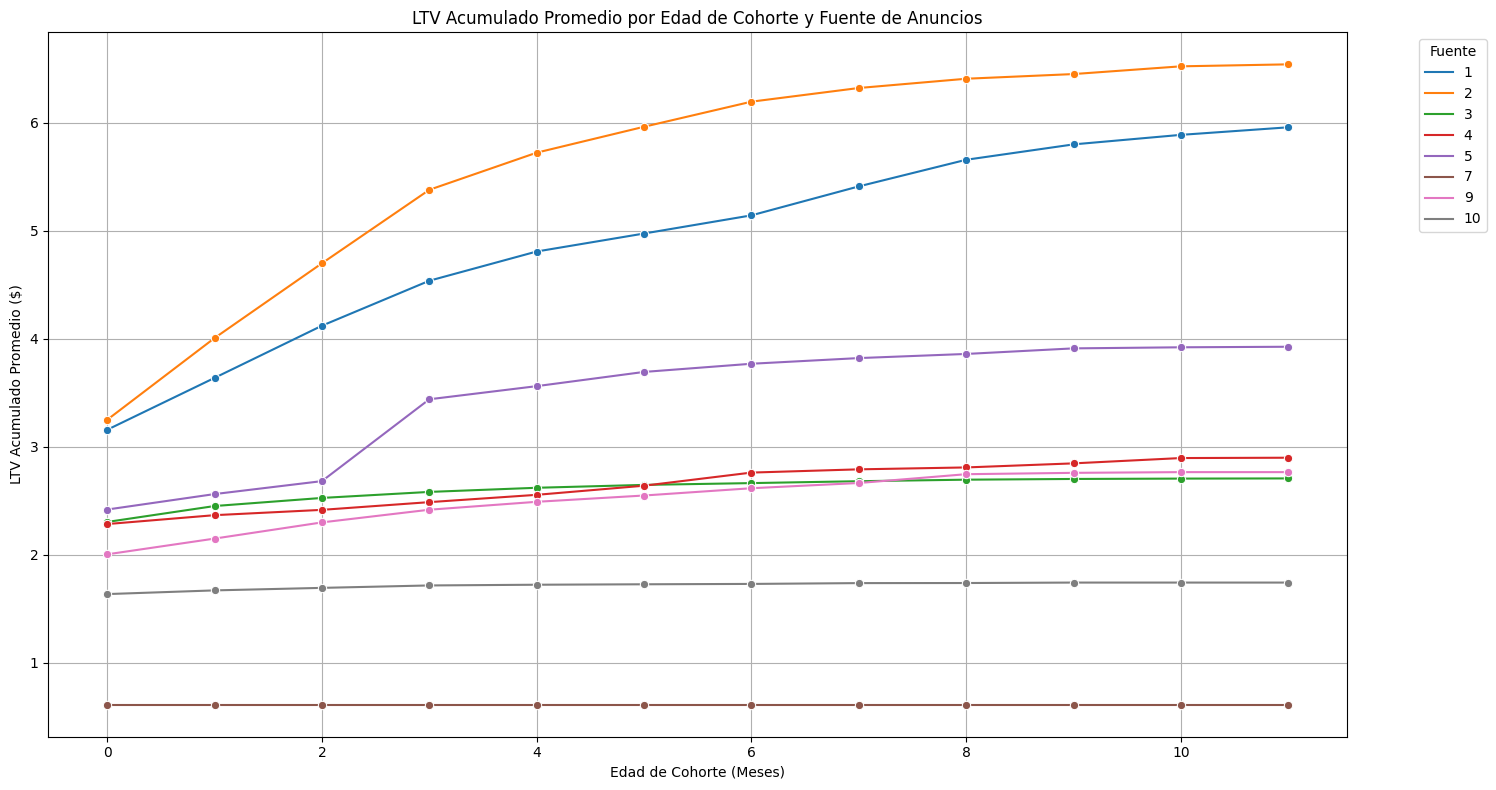

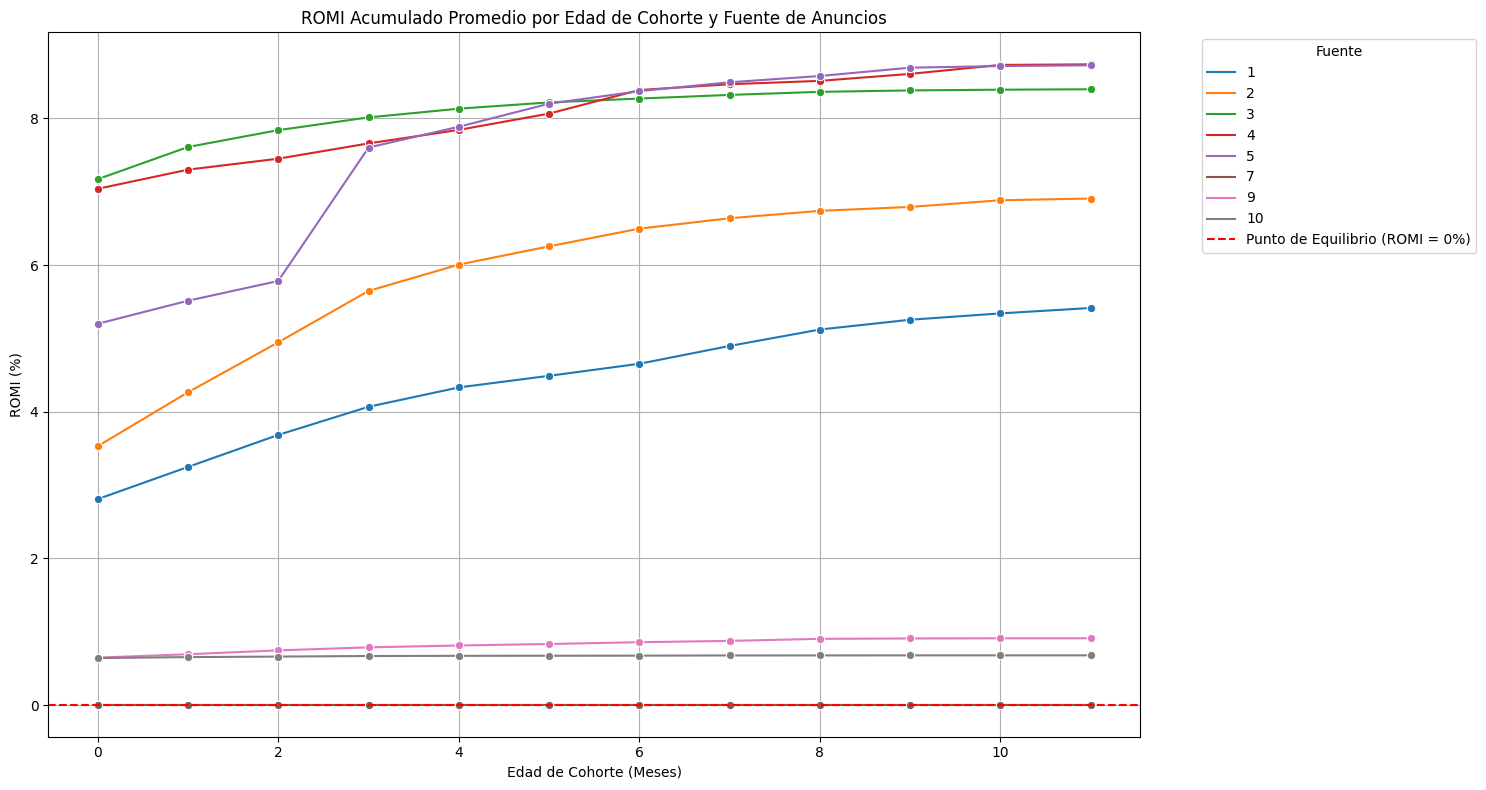

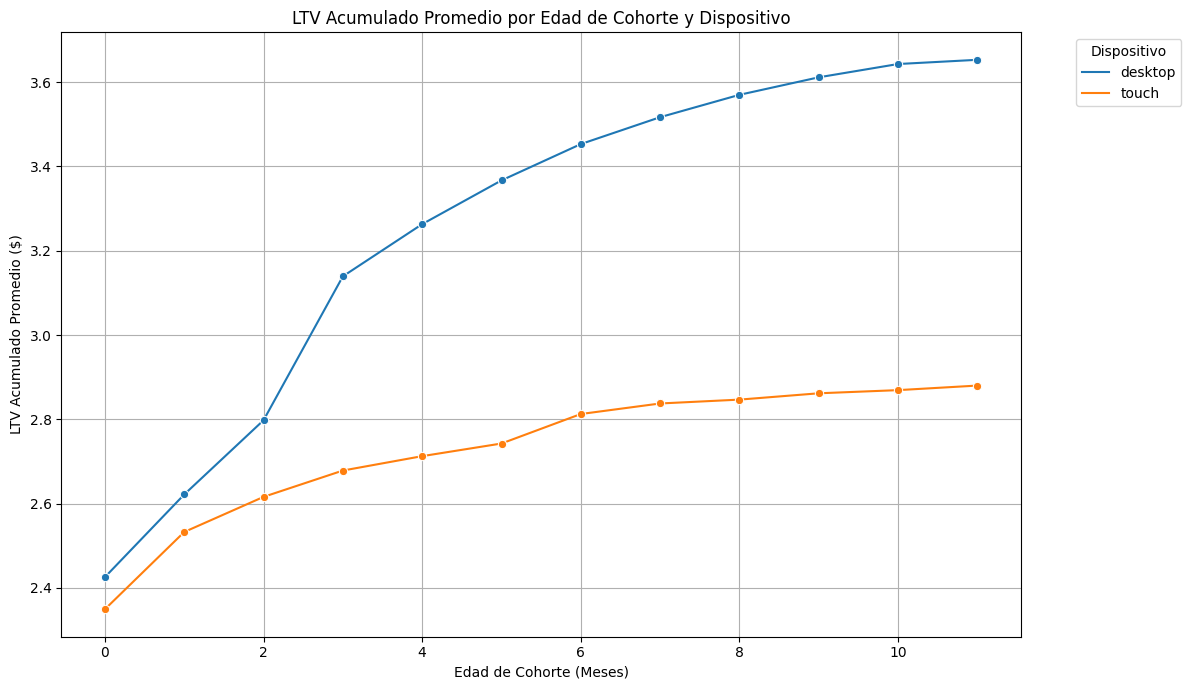

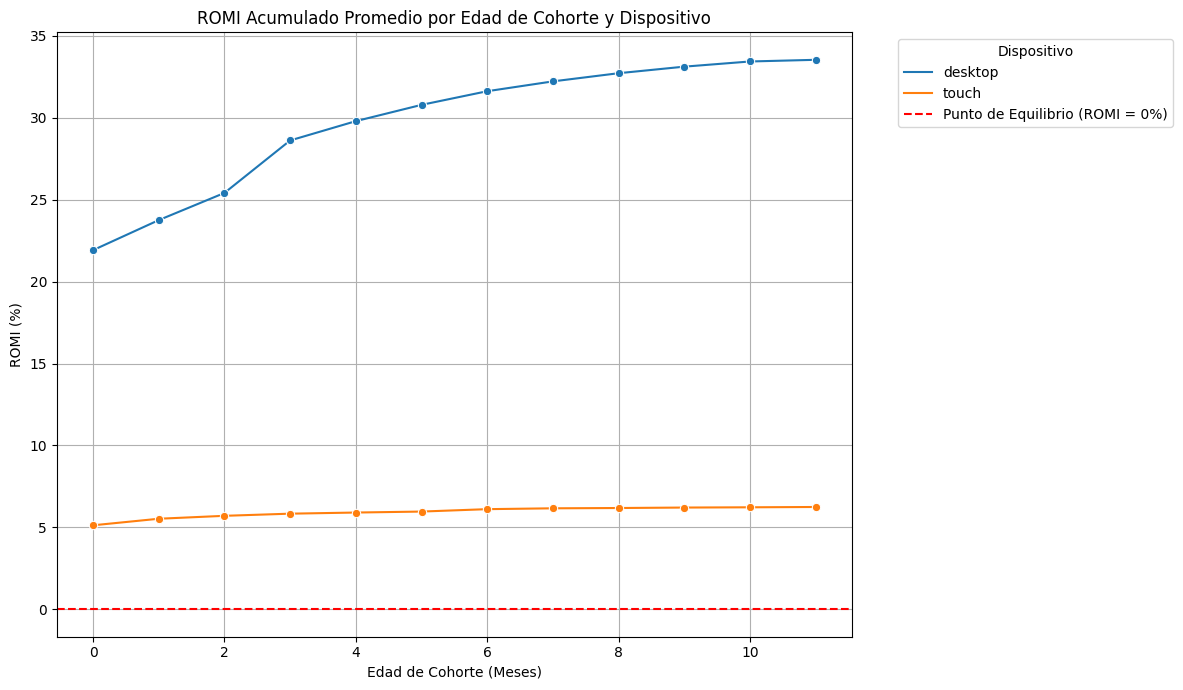

In [25]:
# --- 1. DEFINICIÓN DE LA FUNCIÓN PARA CALCULAR MÉTRICAS POR DIMENSIÓN ---

def calculate_metrics_by_dimension(df, dimension_col):
    cohorts_dim = df.groupby(['first_order_month', 'order_month', dimension_col]).agg(
        revenue=('Revenue', 'sum')
    ).reset_index()

    cohort_sizes_dim = df.groupby(['first_order_month', dimension_col]).agg(
        n_buyers=('Uid', 'nunique')
    ).reset_index()

    report_dim = pd.merge(cohort_sizes_dim, cohorts_dim, on=['first_order_month', dimension_col])

    report_dim['gp'] = report_dim['revenue'] * margin_rate
    report_dim['age'] = (report_dim['order_month'] - report_dim['first_order_month']) / np.timedelta64(1, 'M')
    report_dim['age'] = report_dim['age'].round().astype('int')

    report_dim['ltv_incremental'] = report_dim['gp'] / report_dim['n_buyers']

    ltv_pivot_dim = report_dim.pivot_table(
        index=['first_order_month', dimension_col],
        columns='age',
        values='ltv_incremental',
        aggfunc='mean'
    ).round(2)

    ltv_pivot_dim_filled = ltv_pivot_dim.fillna(0)
    ltv_accumulated_dim = ltv_pivot_dim_filled.cumsum(axis=1)

    monthly_costs_dim = df_costs_us.groupby('cost_month_period')['costs'].sum().reset_index()
    monthly_costs_dim.columns = ['month_period', 'total_monthly_cost']

    romi_data = pd.merge(
        ltv_accumulated_dim.reset_index(), # Aquí las edades (0, 1, 2...) son nombres de columnas
        monthly_costs_dim,
        left_on='first_order_month',
        right_on='month_period',
        how='inner'
    )
    romi_data = pd.merge(
        romi_data,
        cohort_sizes_dim,
        on=['first_order_month', dimension_col],
        how='inner'
    )

    romi_data['cac'] = romi_data['total_monthly_cost'] / romi_data['n_buyers']

    columns_for_romi_calculation = [
        col for col in romi_data.columns
        if isinstance(col, (int, float)) 
        and col not in ['cac', 'total_monthly_cost', 'n_buyers'] # Excluye las columnas de CAC y costos
    ]

    for col in columns_for_romi_calculation:
        romi_data[col] = (romi_data[col] / romi_data['cac']) * 100

    romi_pivot_dim = romi_data.set_index(['first_order_month', dimension_col])[columns_for_romi_calculation]


    return ltv_accumulated_dim, romi_pivot_dim


# --- 2. VISUALIZACIÓN DE MÉTRICAS POR FUENTE DE ANUNCIOS ('first_source') ---

ltv_by_source, romi_by_source = calculate_metrics_by_dimension(orders_with_cohort_enriched, 'first_source')

plt.figure(figsize=(15, 8))
sns.lineplot(data=ltv_by_source.mean(level='first_source').T, dashes=False, marker='o')
plt.title('LTV Acumulado Promedio por Edad de Cohorte y Fuente de Anuncios')
plt.xlabel('Edad de Cohorte (Meses)')
plt.ylabel('LTV Acumulado Promedio ($)')
plt.grid(True)
plt.legend(title='Fuente', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 8))
sns.lineplot(data=romi_by_source.mean(level='first_source').T, dashes=False, marker='o')
plt.title('ROMI Acumulado Promedio por Edad de Cohorte y Fuente de Anuncios')
plt.xlabel('Edad de Cohorte (Meses)')
plt.ylabel('ROMI (%)')
plt.axhline(y=0, color='r', linestyle='--', label='Punto de Equilibrio (ROMI = 0%)')
plt.grid(True)
plt.legend(title='Fuente', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# --- 3. VISUALIZACIÓN DE MÉTRICAS POR DISPOSITIVO ('first_device') ---
ltv_by_device, romi_by_device = calculate_metrics_by_dimension(orders_with_cohort_enriched, 'first_device')

plt.figure(figsize=(12, 7))
sns.lineplot(data=ltv_by_device.mean(level='first_device').T, dashes=False, marker='o')
plt.title('LTV Acumulado Promedio por Edad de Cohorte y Dispositivo')
plt.xlabel('Edad de Cohorte (Meses)')
plt.ylabel('LTV Acumulado Promedio ($)')
plt.grid(True)
plt.legend(title='Dispositivo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 7))
sns.lineplot(data=romi_by_device.mean(level='first_device').T, dashes=False, marker='o')
plt.title('ROMI Acumulado Promedio por Edad de Cohorte y Dispositivo')
plt.xlabel('Edad de Cohorte (Meses)')
plt.ylabel('ROMI (%)')
plt.axhline(y=0, color='r', linestyle='--', label='Punto de Equilibrio (ROMI = 0%)')
plt.grid(True)
plt.legend(title='Dispositivo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - ¡Impresionante despliegue analítico! Esta sección demuestra un manejo sólido de cohortes, KPIs, visualización y cálculos avanzados como LTV, CAC y ROMI. El análisis es profundo y está claramente sustentado en los datos. Continúa con esta precisión en tus conclusiones finales. </div>


## Paso 3. Escribe una conclusión: aconseja a los expertos de marketing cuánto dinero invertir y dónde

**Conclusión y Recomendaciones de Inversión de Marketing** (Versión Concisa)

El análisis de LTV y ROMI acumulado revela que la inversión de marketing actual no es rentable, con un ROMI global del -61.71%. Ninguna fuente de adquisición o tipo de dispositivo alcanza un ROMI positivo (por encima del 0%), lo que indica pérdidas netas.

Las métricas clave para nuestras recomendaciones son el LTV (valor a largo plazo del cliente) y el ROMI (rentabilidad de la inversión de marketing). Nos enfocamos en ellas para asegurar que las inversiones no solo atraigan clientes, sino que generen ganancias sostenibles.

**Conclusiones Clave de los Gráficos**:

- **Por Fuente de Anuncios**

    - Fuentes 3 y 4 generan el LTV más alto ($6+), y sus ROMI, aunque negativos, son los "menos malos" (cercanos al 8-9%).

    - Las demás fuentes (1, 2, 7, 9, 10) tienen LTVs bajos y ROMIs cercanos a 0%, siendo altamente ineficientes.

- **Por Dispositivo**:

    - Desktop supera a "Touch" en LTV ($3.60 vs $2.80) y ROMI (33-34% vs 6%). Ambos dispositivos operan con ROMI negativos.

**Recomendaciones de Inversión**:

1. **Enfocarse en la Rentabilidad, No en el Volumen**: Antes de aumentar el presupuesto, la prioridad es que las inversiones actuales generen ganancias.

2. **Priorizar Fuentes 3 y 4**:

    - Invertir la mayor parte del presupuesto aquí. Son las que tienen el mayor potencial para volverse rentables.

    - Optimizar agresivamente estas campañas (audiencias, creatividades, ofertas) para mejorar su LTV y ROMI, buscando cruzar el umbral del 0% de ROMI.

3. **Reducir o Pausar Fuentes Ineficientes (1, 2, 7, 9, 10)**: Estas fuentes están quemando presupuesto sin retorno. Se debe minimizar su gasto o suspenderlas hasta que se identifiquen estrategias claras para hacerlas rentables.

4. **Priorizar Desktop sobre Touch**:

    - Invertir más en campañas dirigidas a usuarios de escritorio. Su rendimiento es significativamente superior.

    - Investigar y optimizar la experiencia para usuarios "Touch" antes de aumentar la inversión en este canal. Puede haber barreras técnicas o de usabilidad que impidan su rentabilidad.

5. **Fortalecer la Retención de Clientes**: Dada la dificultad en la adquisición rentable, invertir en programas de lealtad y marketing para clientes existentes es crucial para aumentar el LTV general sin los altos costos de adquisición.

En síntesis, la estrategia debe ser **enfocarse y optimizar las fuentes y dispositivos más prometedores (Fuentes 3 y 4, Desktop)**, mientras se recorta la inversión en los canales de bajo rendimiento, todo ello con el objetivo primordial de convertir el ROMI negativo en positivo.

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - Tu conclusión es clara, concisa y muy bien fundamentada en métricas relevantes. La priorización de fuentes y dispositivos está estratégicamente argumentada, y las recomendaciones apuntan directamente a la eficiencia del gasto. Excelente cierre analítico. </div>


## Comentario general del revisor



<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a> 
    
¡Felicidades! Tu proyecto está <b>aprobado</b>. Has logrado desarrollar un análisis completo, metódico y orientado a decisiones, cumpliendo con los requerimientos del brief de manera destacada. A continuación, destaco los puntos positivos clave:

### Puntos Positivos:

* **Preparación de datos:** Se cargaron correctamente los datasets y se procesaron con atención a los tipos de datos, fechas y estructuras necesarias para el análisis.
* **Visualización y análisis gráfico:** Los gráficos por fuente y dispositivo aportan claridad y enriquecen la comprensión del comportamiento del usuario y la rentabilidad.
* **Ingeniería de cohortes y métricas clave:** Aplicaste con precisión cálculos avanzados como LTV, CAC y ROMI, tanto a nivel general como por dimensión, lo cual demuestra un nivel técnico sólido.
* **Interpretación de resultados y recomendaciones:** Las conclusiones son prácticas, coherentes con los hallazgos, y brindan guías estratégicas viables para el equipo de marketing.

Este trabajo integra muy bien los distintos componentes del proyecto, desde la exploración hasta el cierre estratégico. Tu capacidad para vincular análisis técnico con decisiones de negocio ha quedado muy bien reflejada. Excelente ejecución. </div>
